In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../utils")

from utils import load_csv

# Cấu hình hiển thị
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
symbols = ["fpt", "hpg", "vnm"]
dfs = {}
for symbol in symbols:
    path = f"../../data/clean/{symbol}.csv"
    dfs[symbol] = load_csv(path)

2025-06-14 10:19:30,600 - INFO - ✅ Load CSV thành công: ../../data/clean/fpt.csv | shape = (4564, 6)
2025-06-14 10:19:30,621 - INFO - ✅ Load CSV thành công: ../../data/clean/hpg.csv | shape = (4361, 6)
2025-06-14 10:19:30,642 - INFO - ✅ Load CSV thành công: ../../data/clean/vnm.csv | shape = (4796, 6)


In [3]:
def explore_basic_info(df: pd.DataFrame, name: str):
    print(f"\n📊 Thông tin cơ bản - {name.upper()}")
    print(df.info())
    print("\n📈 Mô tả thống kê:")
    print(df.describe())

In [4]:
# Cell 4: Gọi khám phá dữ liệu cho từng mã
for symbol, df in dfs.items():
    explore_basic_info(df, symbol)



📊 Thông tin cơ bản - FPT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4564 entries, 0 to 4563
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4564 non-null   object 
 1   open    4564 non-null   float64
 2   high    4564 non-null   float64
 3   low     4564 non-null   float64
 4   close   4564 non-null   float64
 5   volume  4564 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 214.1+ KB
None

📈 Mô tả thống kê:
              open         high          low        close        volume
count  4564.000000  4564.000000  4564.000000  4564.000000  4.564000e+03
mean     26.024242    26.303048    25.762954    26.033850  1.408037e+06
std      32.292018    32.633570    31.974092    32.317605  1.825076e+06
min       2.040000     2.150000     2.040000     2.110000  1.820000e+03
25%       6.090000     6.130000     6.047500     6.070000  2.818875e+05
50%      11.160000    11.270000    11.050000    11.1

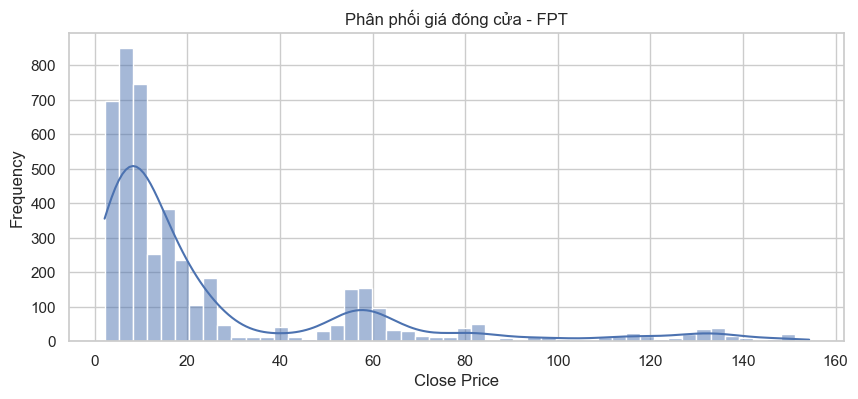

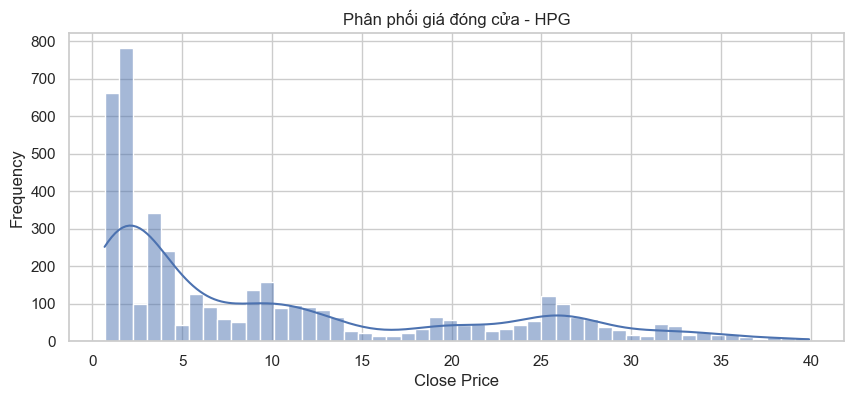

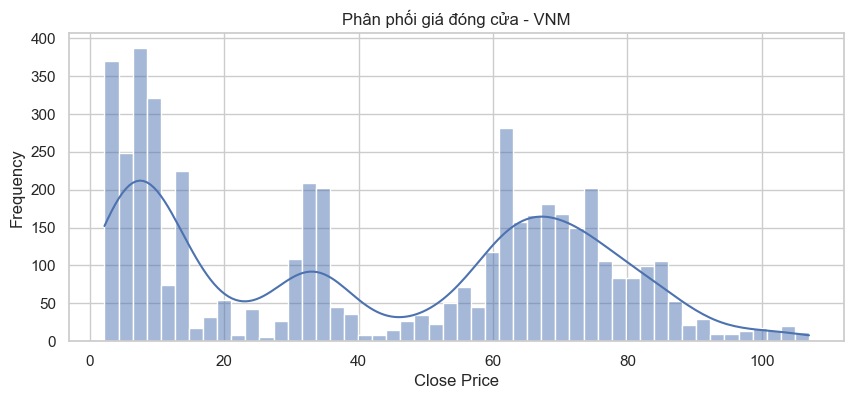

In [5]:
for symbol, df in dfs.items():
    plt.figure(figsize=(10, 4))
    sns.histplot(df["close"], kde=True, bins=50)
    plt.title(f"Phân phối giá đóng cửa - {symbol.upper()}")
    plt.xlabel("Close Price")
    plt.ylabel("Frequency")
    plt.show()


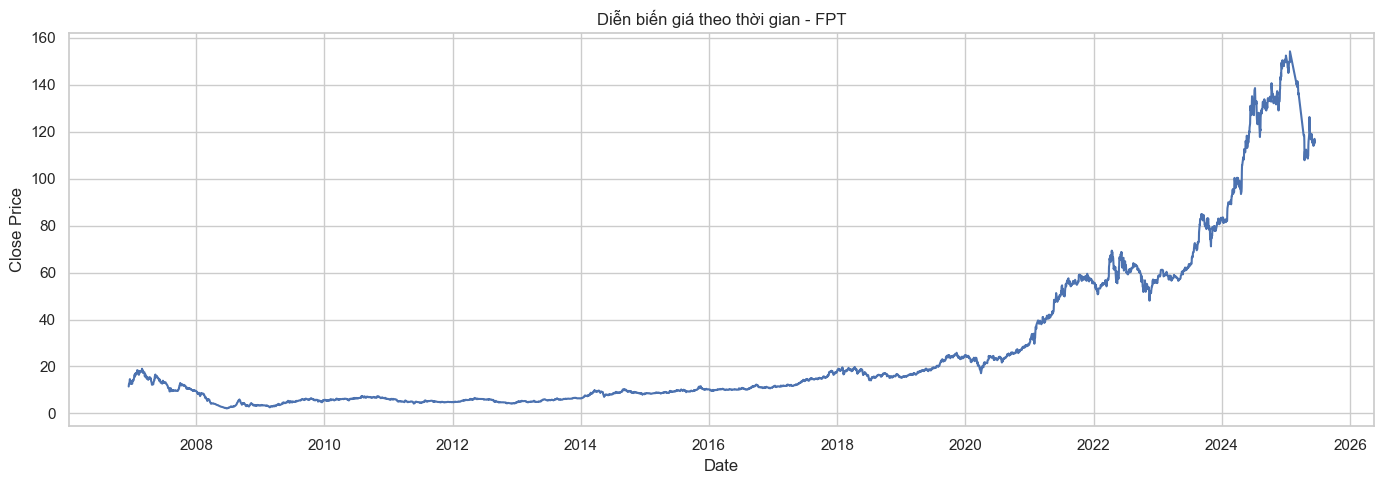

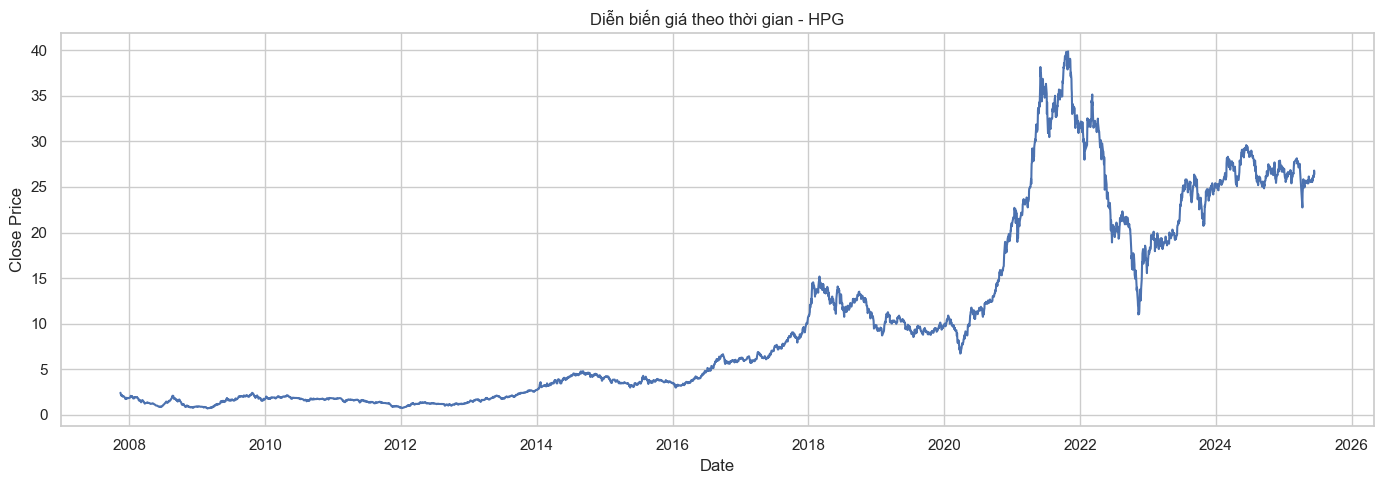

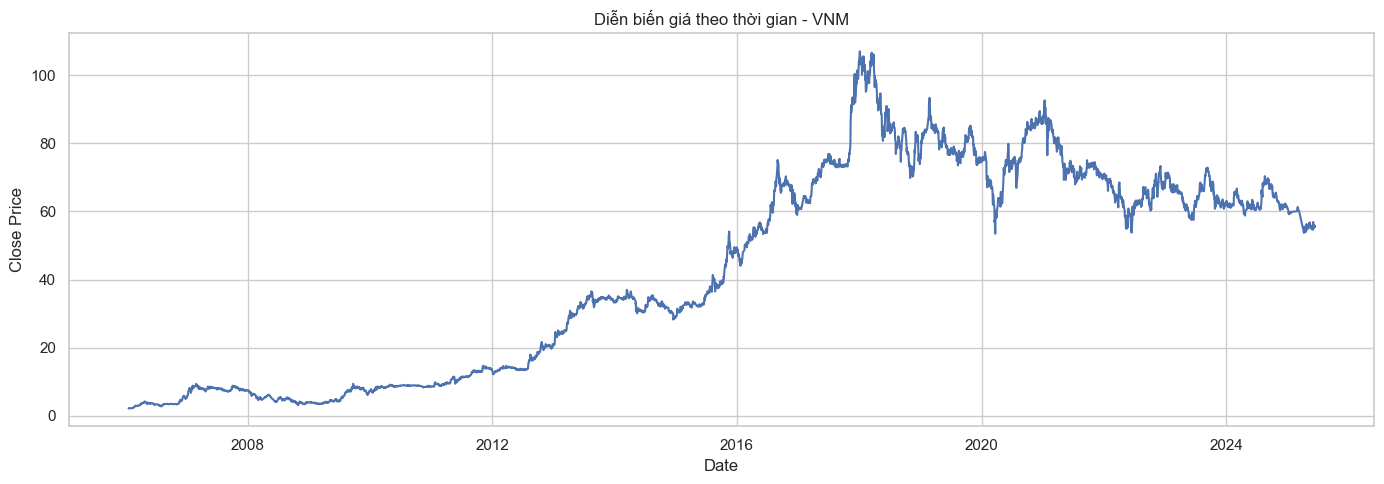

In [6]:
for symbol, df in dfs.items():
    plt.figure(figsize=(14, 5))
    plt.plot(pd.to_datetime(df["date"]), df["close"], label="Close")
    plt.title(f"Diễn biến giá theo thời gian - {symbol.upper()}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
